# `data_process`

In [3]:
#default_exp data_process

In [20]:
#export
import os
from pathlib import Path
from itertools import groupby
import mlcrate
from multiprocessing import Pool
from pycocotools import mask as mutils
from pycocotools import _mask as coco_mask
import numpy as np
import pandas as pd
import cv2, PIL
import zlib
import base64

from kgl_humanprotein.config.config import *

run on collie.local


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
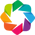

In [5]:
import holoviews as hv
hv.extension('bokeh')

In [6]:
dir_data = Path('../data')
dir_models = Path('../models/')

dir_hpa = dir_data/'hpa-single-cell-image-classification'

## Miscellaneous

In [7]:
#export
def imgids_from_directory(path):
    if isinstance(path, str): 
        path = Path(path)
        
    imgids = set(n.stem.split('_')[0] for n in path.iterdir())
    return list(imgids)

In [8]:
#export
imgids_testing = [
    '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
    '001838f8-bbca-11e8-b2bc-ac1f6b6435d0',
    '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0',
    'a34d8680-bb99-11e8-b2b9-ac1f6b6435d0',
    '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0']

## Loading image samples

In [9]:
#export

def read_img(
    dir_data, image_id, color,
    train_or_test='train', image_size=None, suffix='.png'):
    
    filename = (f'{dir_data}/{train_or_test}/'
                f'{image_id}_{color}{suffix}')
    assert os.path.exists(filename), f'not found {filename}'
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    if image_size is not None:
        img = cv2.resize(img, (image_size, image_size))
    if img.max() > 255:
        img_max = img.max()
        img = (img/255).astype('uint8')
    return img

def load_RGBY_image(
    dir_data, image_id, rgb_only=False,
    train_or_test='train', image_size=None, suffix='.png'):
    
    red, green, blue = [
        read_img(
            dir_data, image_id, color, 
            train_or_test, image_size, suffix) 
        for color in ('red', 'green', 'blue')]

    channels = [red, green, blue]
    
    if not rgb_only:
        yellow = read_img(
            dir_data, image_id, "yellow", 
            train_or_test, image_size, suffix)
        channels.append(yellow)
        
    stacked_images = np.transpose(np.array(channels), (1,2,0))
    return stacked_images

## Cell segmentation

- https://www.kaggle.com/lnhtrang/hpa-public-data-download-and-hpacellseg#Using-HPA-segmentation-tool

- https://www.kaggle.com/its7171/mmdetection-for-segmentation-training

Install `hpacellseg`:

In [2]:
# !pip install https://github.com/CellProfiling/HPA-Cell-Segmentation/archive/master.zip

     / 17 kB 593 kB/ss
     / 131 kB 964 kB/s
  Created wheel for hpacellseg: filename=hpacellseg-0.1.8-py3-none-any.whl size=14919 sha256=20d25f996e95ac2b34fcc9af3c0a5ac6aac37ebbdf202c6566dea787f4715a5c
  Stored in directory: /private/var/folders/j8/yjq07z717675nj9j6bk7zxc40000gn/T/pip-ephem-wheel-cache-k02orb4f/wheels/cd/d8/de/04ad08802d62537f8dffc89b6a7ce0a53c3d29ea6eae522ab1
  Created wheel for pytorch-zoo: filename=pytorch_zoo-0.0.0-py3-none-any.whl size=30138 sha256=10faf391a11baa028d5c6e3999e1ad604ca4948727ad540fb291484990ed0f22
  Stored in directory: /private/var/folders/j8/yjq07z717675nj9j6bk7zxc40000gn/T/pip-ephem-wheel-cache-k02orb4f/wheels/58/0e/c7/567928a140c7cb2533c59bdc81fded8fe720ea8caad1659d8c
Successfully built hpacellseg pytorch-zoo


In [7]:
#export
import hpacellseg.cellsegmentator as cellsegmentator
from hpacellseg.utils import label_cell, label_nuclei
from tqdm import tqdm

class CellSegmentator(cellsegmentator.CellSegmentator):
    def __init__(self, nuc_model, cell_model, *args, **kwargs):
        nuc_model = str(nuc_model)
        cell_model = str(cell_model)
        super().__init__(nuc_model, cell_model, *args, **kwargs)
        
    def __call__(self, red, yellow, blue):
        '''
        `red`: list
          Red images' file paths.
        `yellow`: list
          Yellow images' file paths.
        `blue`: list
          Blue images' file paths.
        '''
        assert len(red) == len(yellow) == len(blue)

        if isinstance(red[0], Path):
            red, yellow, blue = (
                [str(n) for n in fns] 
                for fns in [red, yellow, blue])

        print('Predicting nuclei and cells...', end='')
        segs_nucl = self.pred_nuclei(blue)
        segs_cell = self.pred_cells([red, yellow, blue])
        print(' done.')

        print('Labelling cells...', end='')
        masks = []
        for seg_nucl, seg_cell in zip(segs_nucl, segs_cell):
            mask_nucl, mask_cell = label_cell(seg_nucl, seg_cell)
            masks.append((mask_nucl, mask_cell))
        print(' done.')
            
        return masks
    
    
def get_cellmask(img, segmentator):
    img_r, img_y, img_b = img[...,0], img[...,3], img[...,2]
    
    masks = segmentator(red=[img_r], yellow=[img_y], blue=[img_b])
    
    _, mask = masks[0]
    return mask

In [8]:
dir_cellseg_model = Path('../models/HPA_Cell_Segmentation/')
NUC_MODEL = dir_cellseg_model/'nuclei-model.pth'
CELL_MODEL = dir_cellseg_model/'cell-model.pth'

segmentator = CellSegmentator(
    NUC_MODEL,
    CELL_MODEL,
    scale_factor=0.25,
    device="cuda",
    padding=False,
    multi_channel_model=True)

No GPU found, using CPU.
/Users/jack/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'pytorch_zoo.unet.DPNUnet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/jack/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/jack/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has change

please compile abn


In [187]:
def test_segment_given_filepaths():

    imgids = imgids_testing[:]

    fns_red, fns_yellow, fns_blue = (
        [dir_hpa/'train'/f'{imgid}_{color}.png' for imgid in imgids]
        for color in ('red', 'yellow', 'blue'))
    
    masks = segmentator(red=fns_red, yellow=fns_yellow, blue=fns_blue)

## Masks, RLE and bboxes

In [64]:
def encode_binary_mask(mask):
    """Converts a binary mask into OID challenge encoding ascii text."""

    # check input mask --
    if mask.dtype != np.bool:
        raise ValueError(
        "encode_binary_mask expects a binary mask, received dtype == %s" %
        mask.dtype)

    mask = np.squeeze(mask)
    if len(mask.shape) != 2:
        raise ValueError(
        "encode_binary_mask expects a 2d mask, received shape == %s" %
        mask.shape)

    # convert input mask to expected COCO API input --
    mask_to_encode = mask.reshape(mask.shape[0], mask.shape[1], 1)
    mask_to_encode = mask_to_encode.astype(np.uint8)
    mask_to_encode = np.asfortranarray(mask_to_encode)

    # RLE encode mask --
    encoded_mask = coco_mask.encode(mask_to_encode)[0]["counts"]

    # compress and base64 encoding --
    binary_str = zlib.compress(encoded_mask, zlib.Z_BEST_COMPRESSION)
    base64_str = base64.b64encode(binary_str)
    return base64_str.decode()



def coco_rle_encode(bmask):
    rle = {'counts': [], 'size': list(bmask.shape)}
    counts = rle.get('counts')
    for i, (value, elements) in enumerate(groupby(bmask.ravel(order='F'))):
        if i == 0 and value == 1:
            counts.append(0)
        counts.append(len(list(elements)))
    return rle


def get_rles(mask):
    ids_cell = np.unique(mask)
    
    rles = []
    for id in ids_cell:
        if id == 0: 
            continue

        bmask = np.where(mask == id, 1, 0)

        rle = coco_rle_encode(bmask)
        rles.append(rle)
        
    height, width = mask.shape
    rles = mutils.frPyObjects(rles, height, width)        
    
    return rles


def rles2bboxes(rles):
    if len(rles) == 0:
        return []

    bboxes = mutils.toBbox(rles)
    bboxes[:,2] += bboxes[:,0]
    bboxes[:,3] += bboxes[:,1]
    
    return bboxes


def crop_image(img, bbox, rle=None):
    bbox = bbox.astype(np.int16)
    x0, y0, x1, y1 = bbox
    
    crop = img[y0:y1, x0:x1]
    
    if rle is not None:
        bmask = mutils.decode(rle)

        crop = bmask[y0:y1, x0:x1][...,None] * crop
    
    return crop


def get_crops(img, bboxes, rles=None):
    if rles is not None:
        assert len(bboxes) == len(rles)
        
    crops = []
    for i, bbox in enumerate(bboxes):

        rle = None if rles is None else rles[i]
        crop = crop_image(img, bbox, rle)
        crops.append(crop)
        
    return crops


def remove_faint_greens(xs, crops, green_thres=64):
    assert len(xs) == len(crops)
    xs_out = []
    for x, crop in zip(xs, crops):
        if crop[...,1].max() > green_thres:
            xs_out.append(x)
    return xs_out


def pad_to_square(img):
    h, w, c = img.shape
    sz = max(h, w)
    img_padded = np.zeros((sz, sz, c), dtype=img.dtype)
    img_padded[:h, :w] = img.copy()
    return img_padded

In [94]:
def test_imgid_to_crops():
    idx = 3
    imgid = imgids_testing[idx]
    img = load_RGBY_image(dir_hpa, imgid)

    mask = get_cellmask(img, segmentator)
    rles = get_rles(mask)
    bboxes = rles2bboxes(rles)

    crops = get_crops(img, bboxes, rles=rles)

    rles, bboxes, crops = (
        remove_faint_greens(xs, crops, green_thres=64) 
        for xs in [rles, bboxes, crops])

    crops = [pad_to_square(img) for img in crops]
    
    figs = [hv.RGB(img[...,:3])]
    figs += [hv.RGB(img[...,:3]) for img in crops]

    layout = hv.Layout(figs).cols(3)

    h, w = 150, 150
    layout.opts(

        hv.opts.RGB(
            height=h, yaxis=None,
            width=w, xaxis=None),

        hv.opts.Image(
            height=h, yaxis=None,
            width=w, xaxis=None,
            alpha=.2)
    )   
    
    return layout

### Generate dataset of cell crops from `train`

In [59]:
def image_to_crops(
    segmentator, dir_hpa, imgid, dir_out=Path('./'),
    train_or_test='train', green_thres=64):
    '''
    '''
    img = load_RGBY_image(
        dir_hpa, imgid, train_or_test=train_or_test)

    mask = get_cellmask(img, segmentator)
    rles = get_rles(mask)
    bboxes = rles2bboxes(rles)

    crops = get_crops(img, bboxes, rles=rles)

    rles, bboxes, crops = (
        remove_faint_greens(xs, crops, green_thres=green_thres) 
        for xs in [rles, bboxes, crops])

    crops = [pad_to_square(img) for img in crops]
    
    cids = [f'{imgid}_{i}' for i in range(len(crops))]
    
    colors = ['red', 'green', 'blue', 'yellow']
    for cid, crop in zip(cids, crops):
        for channel, color in enumerate(colors):
            cv2.imwrite(
                str(dir_out/f'{cid}_{color}.jpg'), 
                crop[...,channel])
        
    rles = [encode_binary_mask(mutils.decode(rle).astype(bool)) 
            for rle in rles]
    df = pd.DataFrame({'Id': cids, 'rle': rles})
    df['Image_Id'] = imgid
    return df

In [10]:
# Generate crops dataset

train_or_test = 'train'
green_thres = 64

dir_cell_crops = dir_data/'cell_crops'
dir_out = dir_cell_crops/train_or_test
dir_out.mkdir(exist_ok=True)


idxs = range(len(imgids_testing))
def generate_crops(i):
    imgid = imgids_testing[i]
    df = image_to_crops(
        segmentator, dir_hpa, imgid, dir_out=dir_cells_train, 
        train_or_test=train_or_test, green_thres=green_thres)
    return df


# MAX_THRE = 2
# p = Pool(processes=MAX_THRE)

# dfs = []
# for df_img in map(generate_crops, idxs):
#     dfs.append(df_img)

# df = pd.concat(dfs, axis=0)

# df.to_csv(dir_cell_crops/'train.csv')

In [88]:
idx = 3

cid = df.Id.iloc[idx]
rle = df.rle.iloc[idx]

img = load_RGBY_image(dir_cell_crops, df.Id.iloc[6], suffix='.jpg')

hv.RGB(img[...,:3])

:RGB   [x,y]   (R,G,B)

### Generate square cell crops of the same size

In [38]:
def resize_to_same_size(src, dst, size=512):
    fns_src = [n for n in src.iterdir()]
    
    dst = dst/f'images_{size}'
    dst.mkdir(exist_ok=True)
    fns_dst = [dst/f'{n.stem}.png' for n in src.iterdir()]
    
    for fn_src, fn_dst in zip(fns_src, fns_dst):
        img = cv2.imread(str(fn_src), cv2.IMREAD_UNCHANGED)
        img = cv2.resize(
            img, (size, size), interpolation=cv2.INTER_LINEAR)
        cv2.imwrite(str(fn_dst), img)
    
resize_to_same_size(
    Path('../data/cell_crops/train/'), 
    Path(f'../data/protein/test'), size=768)